# EDA and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [2]:
# Load training data from train.csv in datasets folder
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Initial Review of Data 

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051,NaN,NaN,NaN,1474.03,843.981,1,753.5,1486,2198,2930
PID,2051,NaN,NaN,NaN,7.1359e+08,1.88692e+08,5.26301e+08,5.28458e+08,5.35453e+08,9.0718e+08,9.24152e+08
MS SubClass,2051,NaN,NaN,NaN,57.0088,42.8242,20,20,50,70,190
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721,NaN,NaN,NaN,69.0552,23.2607,21,58,68,80,313
Lot Area,2051,NaN,NaN,NaN,10065.2,6742.49,1300,7500,9430,11513.5,159000
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After reviewing the Ames Housing Data Dictionary and the results of running the decribe method for all columns, the following are the steps that will be taken to clean this dataset to narrow down the information, change the data types
for some columns, and address null values:


Features(Columns) to drop from Dataset and Explanation:
- Id : drop, it's the observation number
- PID : Parcel ID, drop, will not use for this for analysis at this time
- Utilities : Type of utilities availabel. Majority (2049/2051) is 'AllPub' therefore will drop
- Condition 2: Proximity to various conditions. Majority (2025/2051) is 'Norm' therefore, will drop
- Roof Matl : Roof Material. Majority (2025/2051) is 'CompShg', therefore will drop
- Heating : Type of heating. Majority (2018/2051) is 'GasA', therefore, will drop
- Low Qual Fin SF : Low quality finished area in sq feet, this quality has mostly 0s, therefore will drop
- Functional : Home functionality. Majority (1915/2051) is 'Typ'  therefore will drop
- Fireplace Qu : Fireplace quality, will drop since half the values are the same
- Paved Drive : Most of the values in this column indicates 'Yes', therefore will not use this in analysis
- Pool Area : Only 9 values in this column, therefore will drop
- Pool QC : Only 9 values in this column, therefore will drop
- Mas Vnr Type: Masonry veneer type. More than half of the values in this column are None, therefore there is not information and it will be dropped 
- Mas Vnr Area: More than half of the values in this column are None, therefore there is not information and it will be dropped 


Features (Columns) to combine: 

The following features were reviewed and based on their information it was decided to combine them together and select which ones were going to be included in the analysis
    
- Garage features
        - Garage Type : Will be included 
        - Garage Yr Blt : will not use this column in analysis
        - Garage Finish : Will not use this column in analysis
        - Garage Cars : Will be included
        - Garage Area : Will be included
        - Garage Qual : will not use this column in analysis
        - Garage Cond : will not use this column in analysis
- Basement features
        - Bsmt Qual : will be included 
        - BsmtFin SF 1: will be included
        - BsmtFin SF 2: will not be included
        - Total Bsmt SF: will be included 
        - BsmtFinType 2: will be included
        - Bsmt Cond : will be included 
        - Bsmt Exposure : will not use this column in analysis
        - BsmtFin Type 1: will be included 
        - BsmtFin Type 2: will not be included 
        - Bsmt Full Bath : basement full bathrooms, most values are 0s, will not be included. 
        - Bsmt Half Bath: basement half bathrooms, most values are 0s, will not be included.


Features (Columns) to change data type:
- MS Subclass : Type of dwelling not a numeric value, convert to object





In [5]:
# Drop Columns
df.drop(columns=['Id', 'PID', 'Utilities', 'Condition 2','Roof Matl', 'Heating','Low Qual Fin SF', 'Functional', 
                 'Fireplace Qu', 'Paved Drive','Pool Area','Pool QC', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Exposure', 
                 'BsmtFin Type 2','Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Finish','Garage Yr Blt', 
                 'Garage Qual', 'Garage Cond'], inplace=True)

In [6]:
# Convert the data type in columns
df['MS SubClass'] = df['MS SubClass'].map(lambda x: str(x))

### Null Values

In [7]:
# Check if there are any null values in any column
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Type        113
Garage Cars          1
Garage Area          1
Fence             1651
Misc Feature      1986
dtype: int64

Reviewed the columns above and their null values. For Garage Area and Garage Cars, this null value is in the same row and it looks like it is a random missing value therefore, will drop this row. 
For BsmtFin SF 1, There is only one null value in each of these columns therefore, it will be dropped

In [8]:
df.dropna(subset=['Garage Area', 'Garage Cars', 'Total Bsmt SF'], inplace=True)

In [9]:
# Convert the null values in Lot Frontage to 0
df['Lot Frontage'] = df['Lot Frontage'].map(lambda cell: 0 if pd.isnull(cell) else cell)
# Convert the missing values in Alley to 'no alley'
df['Alley'] = df['Alley'].map(lambda cell: 'no_alley' if pd.isnull(cell) else cell)
# Convert the missing values in Bsmt Qual to 'no bsmt'
df['Bsmt Qual'] = df['Bsmt Qual'].map(lambda cell: 'no_bsmt' if pd.isnull(cell) else cell)
# Convert the missing values in Bsmt Cond to 'no bsmt'
df['Bsmt Cond'] = df['Bsmt Cond'].map(lambda cell: 'no_bsmt' if pd.isnull(cell) else cell)
# Convert the missing values in BsmtFin Type 1 to 'no bsmt'
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map(lambda cell: 'no_bsmt' if pd.isnull(cell) else cell)
# Convert the missing values in Garage Type to 'no garage'
df['Garage Type'] = df['Garage Type'].map(lambda cell: 'no_garage' if pd.isnull(cell) else cell)
# Convert the null values in Fence to no_fence
df['Fence'] = df['Fence'].map(lambda cell: 'no_fence' if pd.isnull(cell) else cell)
# Convert the null values in Misc Feature to none
df['Misc Feature'] = df['Misc Feature'].map(lambda cell: 'none' if pd.isnull(cell) else cell)

### Collinear Features 

Review the following features related to square footage to evaluate for collinearity
- Lot Area
- Lot Frontage
- Garage Area
- Wood Deck SF
- Open Porch SF
- Gr Liv Area (1st Flr SF + 2nd Flr SF)
- Total Bsmt SF (BsmtFin SF 1 + BsmtFin SF 2 +Bsmt Unf SF

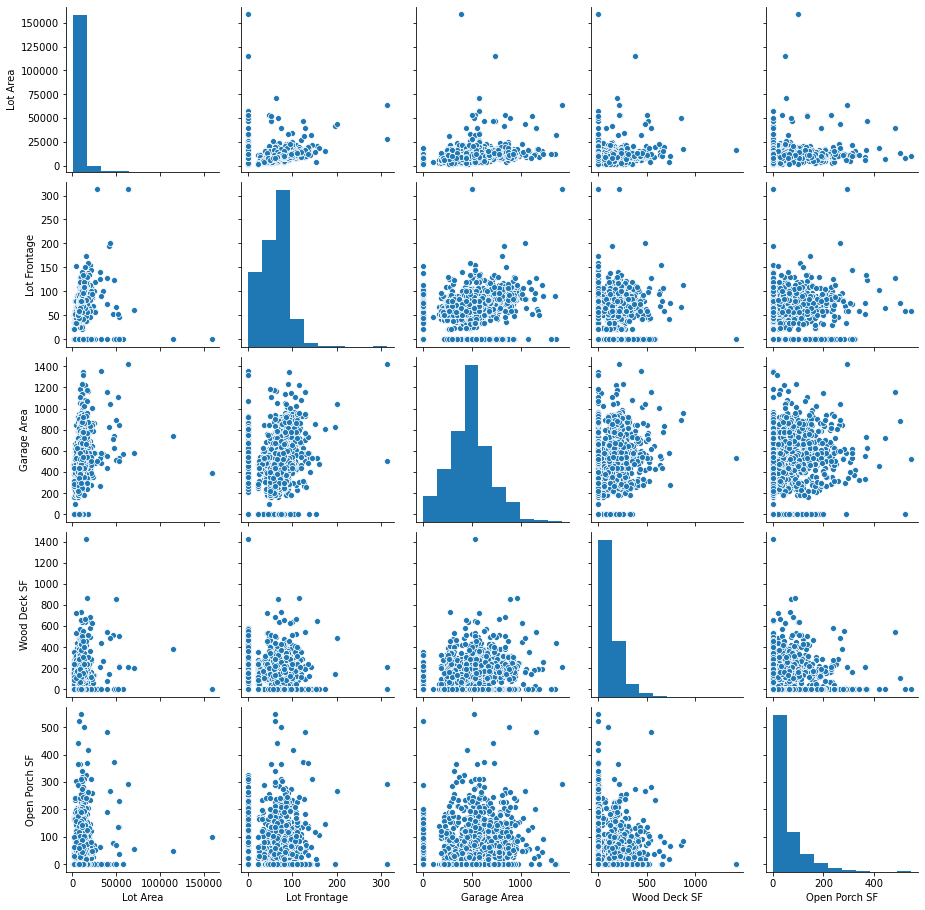

In [10]:
collinear_features_1 = df[['Lot Area','Lot Frontage', 'Garage Area','Wood Deck SF',
                         'Open Porch SF',]]
sns.pairplot(collinear_features_1);

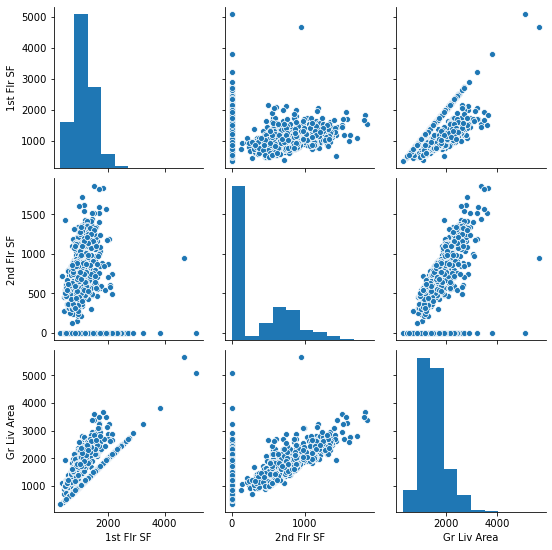

In [11]:
collinear_features_2 = df[['1st Flr SF','2nd Flr SF','Gr Liv Area']]
sns.pairplot(collinear_features_2);

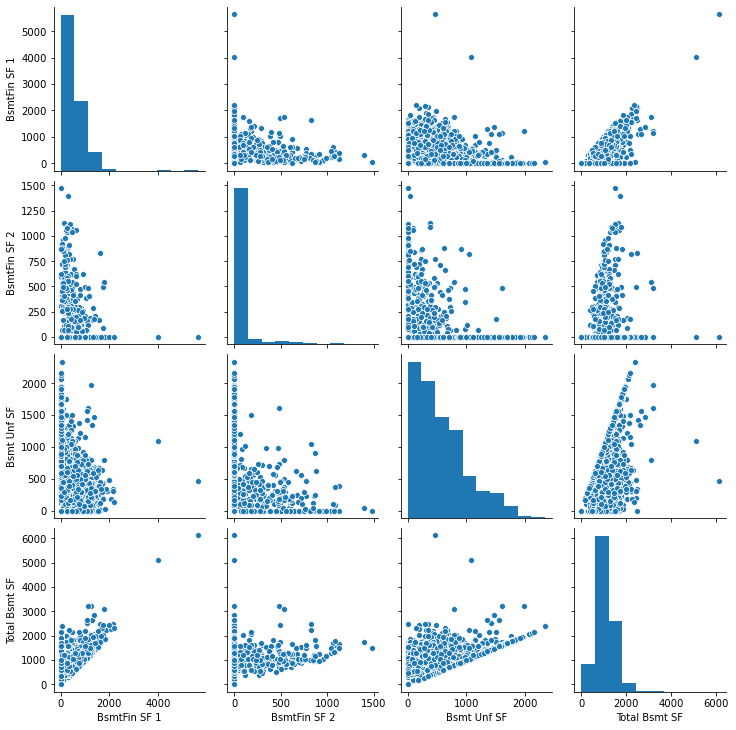

In [12]:
collinear_features_3 = df[['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF']]
sns.pairplot(collinear_features_3);

Findings for Collinearity between features:

- 1st Flr SF:  This is a collinear feature with Gr Liv Area, therefore this column will be dropped
- 2nd Flr SF: This is s a collinear feature with Gr Liv Area, therefore this column will be dropped
- BsmtFin SF 1:  Basement 1 sq ft is a collinear feature with Total Bsmt SF, therefore it will be dropped
- BsmtFin SF 2:  Basement 2 sq ft is a collinear feature with Total Bsmt SF, therefore it will be dropped
- Bsmt Unf SF:  Basement Unfinished sq ft is a collinear feature with Total Bsmt SF, therefore it will be dropped


In [13]:
df.drop(columns=['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF','1st Flr SF','2nd Flr SF'], inplace=True)

### Outliers

Review Outliers for the columns below. These are the features for continuous data that have complete information. Other features such as Pool Area, Screen Porch, Enclosed Porch, etc, have zero values because they don't exist in the house, however a zero value throws off the outlier calculation.

    SalePrice
    Gr Liv Area
    Garage Area
    Total Bsmt SF

In [14]:
def outliers(feature_name):
    stats = df[feature_name].describe()
    Q1 = stats['50%']
    IQR = stats['75%'] - stats['25%']
    high_outliers = Q1+ (5*IQR)
    low_outliers = Q1 - (5*IQR)
    return df[(df[feature_name]<low_outliers)|(df[feature_name]>high_outliers)]

In [15]:
outliers('SalePrice')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,20,RL,100.0,12919,Pave,no_alley,IR1,Lvl,Inside,Gtl,NridgHt,Norm,1Fam,1Story,9,5,2009,2010,Hip,VinylSd,VinylSd,Ex,TA,PConc,Ex,TA,GLQ,2330.0,Ex,Y,SBrkr,2364,2,1,2,1,Ex,11,2,Attchd,3.0,820.0,0,67,0,0,0,no_fence,none,0,3,2010,New,611657
1692,60,RL,114.0,17242,Pave,no_alley,IR1,Lvl,Inside,Gtl,NoRidge,Norm,1Fam,2Story,9,5,1993,1994,Hip,MetalSd,MetalSd,Gd,Gd,PConc,Ex,TA,Rec,1733.0,Ex,Y,SBrkr,3500,3,1,4,1,Ex,11,1,Attchd,3.0,959.0,870,86,0,0,210,no_fence,none,0,5,2006,WD,584500
1964,20,RL,52.0,51974,Pave,no_alley,IR1,Lvl,CulDSac,Gtl,StoneBr,PosN,1Fam,1Story,9,5,2006,2007,Hip,VinylSd,VinylSd,Ex,TA,PConc,Ex,TA,GLQ,2660.0,Ex,Y,SBrkr,2338,2,1,4,1,Gd,8,2,Attchd,3.0,1110.0,0,135,0,0,322,no_fence,none,0,6,2007,New,591587


In [16]:
outliers('Gr Liv Area')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,no_alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,1Fam,2Story,10,5,2008,2008,Hip,Stucco,Stucco,Ex,TA,PConc,Ex,TA,GLQ,6110.0,Ex,Y,SBrkr,5642,2,1,3,1,Ex,12,3,Attchd,2.0,1418.0,214,292,0,0,0,no_fence,none,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,no_alley,IR1,Bnk,Inside,Gtl,Edwards,Norm,1Fam,1Story,10,5,2008,2009,Hip,CemntBd,CmentBd,Ex,TA,PConc,Ex,TA,GLQ,5095.0,Ex,Y,SBrkr,5095,2,1,2,1,Ex,15,2,Attchd,3.0,1154.0,546,484,0,0,0,no_fence,Elev,17000,10,2007,New,183850


In [17]:
outliers('Garage Area')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [18]:
outliers('Total Bsmt SF')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,no_alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,1Fam,2Story,10,5,2008,2008,Hip,Stucco,Stucco,Ex,TA,PConc,Ex,TA,GLQ,6110.0,Ex,Y,SBrkr,5642,2,1,3,1,Ex,12,3,Attchd,2.0,1418.0,214,292,0,0,0,no_fence,none,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,no_alley,IR1,Bnk,Inside,Gtl,Edwards,Norm,1Fam,1Story,10,5,2008,2009,Hip,CemntBd,CmentBd,Ex,TA,PConc,Ex,TA,GLQ,5095.0,Ex,Y,SBrkr,5095,2,1,2,1,Ex,15,2,Attchd,3.0,1154.0,546,484,0,0,0,no_fence,Elev,17000,10,2007,New,183850


Five outliers were found in the columns for Sale Price, Ground Living Area, and Total Basement Sqft. The outliers in Ground Living Area, and Total Basement Sqft are the same. Per the DataFrame Dictionary, the outliers in the Ground Living Area column are not good datapoints. They represent incorrect information for these houses, therefore these two data points will be dropped. The outliers in the Sale Price column will not be dropped since there is not enough information to determine if these data points are incorrect. 

In [19]:
index_to_drop = df[df['Gr Liv Area']>3500].index.values.astype(int)
df.drop(index=index_to_drop, inplace=True)

### Exploratory Analysis

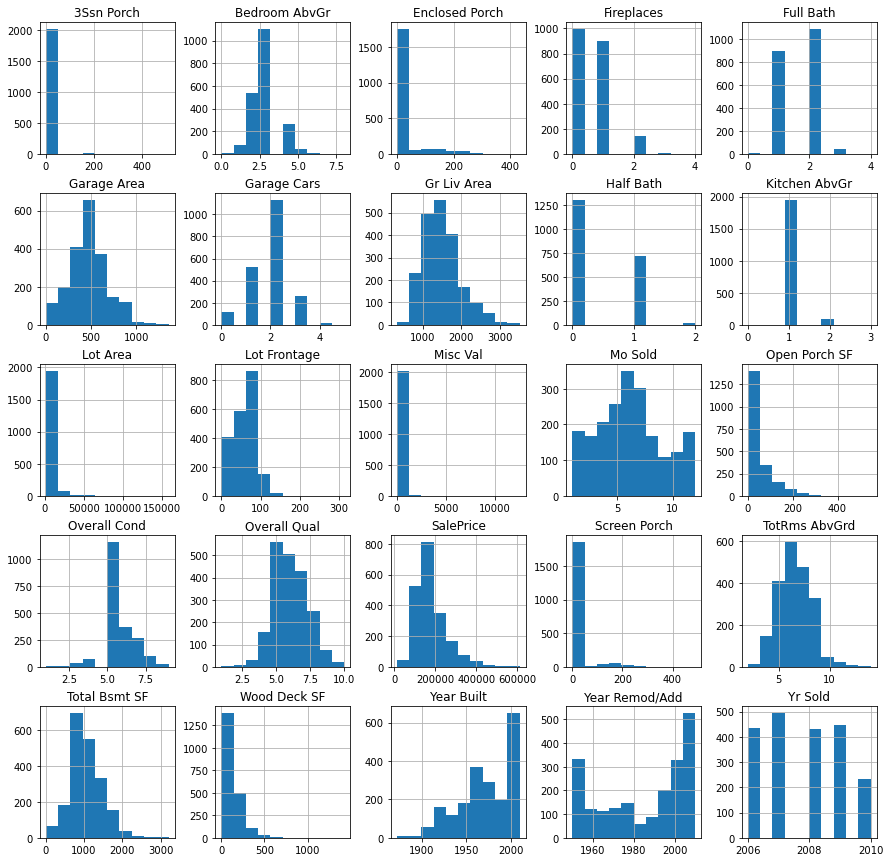

In [20]:
df.hist(figsize=(15,15));

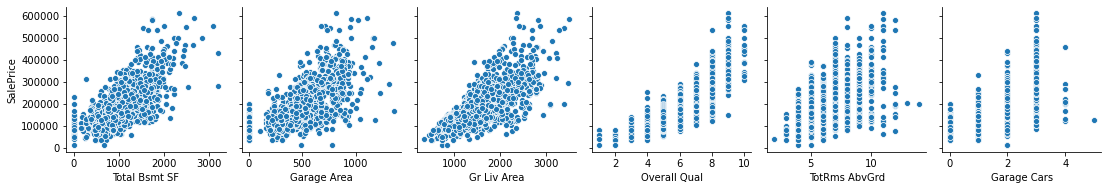

In [21]:
sns.pairplot(df, x_vars=['Total Bsmt SF', 'Garage Area', 
                         'Gr Liv Area', 'Overall Qual', 'TotRms AbvGrd','Garage Cars',], y_vars=['SalePrice']);

The variables above show a linear positive relationship with the target - Sale Price

### Visualizations

The following graphs show Categorical and Numerical data plotted agains Sale Price to identify patterns and answer  some questions about the relevance of each feature and the target.

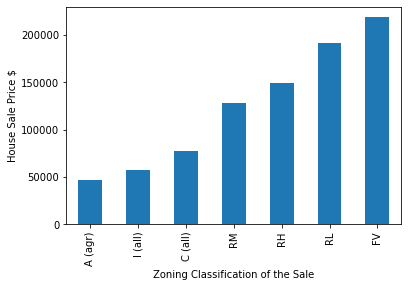

In [22]:
# Which zonings have the highest/lowest average of Sale Price
df.groupby('MS Zoning')['SalePrice'].mean().sort_values().plot.bar();
plt.xlabel('Zoning Classification of the Sale')
plt.ylabel('House Sale Price $');

Houses in Agricultural, Industrial and Commercial areas have a lower average Sale Price than the rest zones

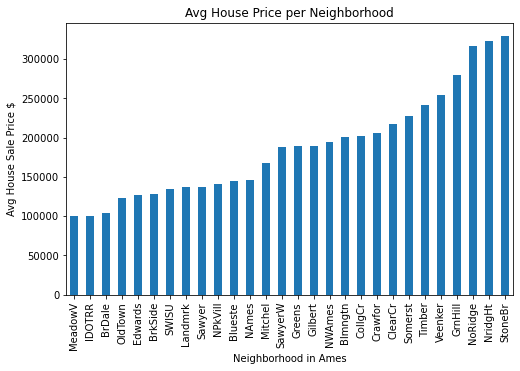

In [23]:
# What is the average price of houses in each Ames neighborhood
plt.figure(figsize=(8,5))
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot.bar();
plt.title('Avg House Price per Neighborhood')
plt.xlabel('Neighborhood in Ames')
plt.ylabel('Avg House Sale Price $');

Houses in Stone Brook, Northridge Heights, Northridge, Green Hills have the highest average in sale price than the rest of the neighborhoods in Ames 

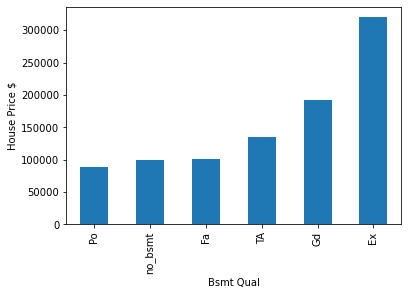

In [24]:
# Do houses with a basement have higher sale price
df.groupby('Bsmt Qual')['SalePrice'].median().sort_values().plot.bar();
plt.ylabel('House Price $');

Yes, houses with a basement with an excellent quality have a higher average sale price

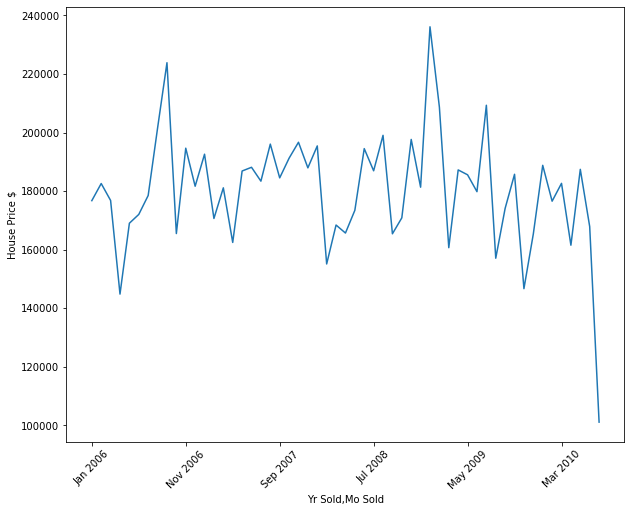

In [25]:
# Did prices go down during the Housing crash market
plt.figure(figsize=(10,8))
df[['Mo Sold','Yr Sold', 'SalePrice']].groupby(['Yr Sold', 'Mo Sold'])['SalePrice'].mean().plot.line()
plt.ylabel('House Price $');
plt.xticks([0, 10, 20, 30, 40, 50],('Jan 2006', 'Nov 2006', 'Sep 2007', 'Jul 2008', 'May 2009', 'Mar 2010'), rotation=45);

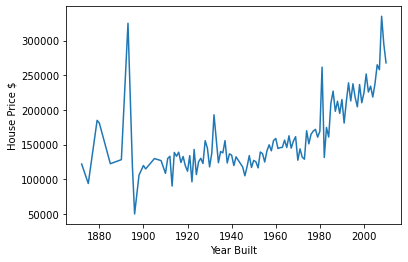

In [26]:
date1 = df.groupby('Year Built')['SalePrice'].mean()
date1.sort_index().plot.line();
plt.ylabel('House Price $');

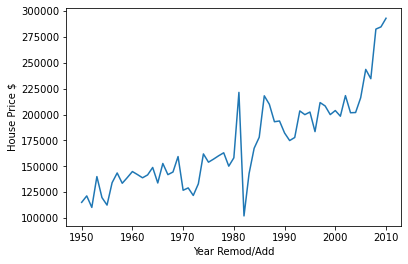

In [27]:
date2 = df.groupby('Year Remod/Add')['SalePrice'].mean()
date2.sort_index().plot.line();
plt.ylabel('House Price $');

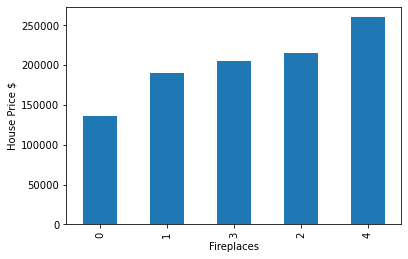

In [28]:
# Do houses with a fireplace have a higher sale price
df.groupby('Fireplaces')['SalePrice'].median().sort_values().plot.bar();
plt.ylabel('House Price $');

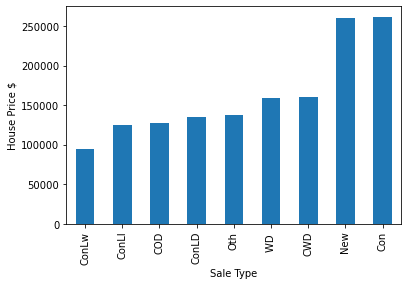

In [29]:
df.groupby('Sale Type')['SalePrice'].median().sort_values().plot.bar();
plt.ylabel('House Price $');

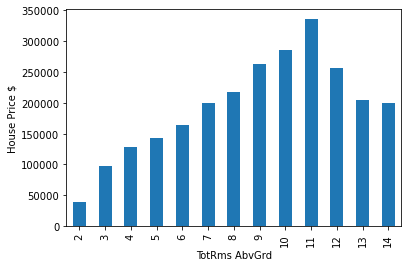

In [30]:
df.groupby('TotRms AbvGrd')['SalePrice'].mean().plot.bar();
plt.ylabel('House Price $');

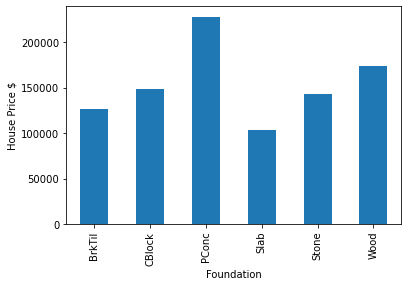

In [31]:
df.groupby('Foundation')['SalePrice'].mean().plot.bar();
plt.ylabel('House Price $');

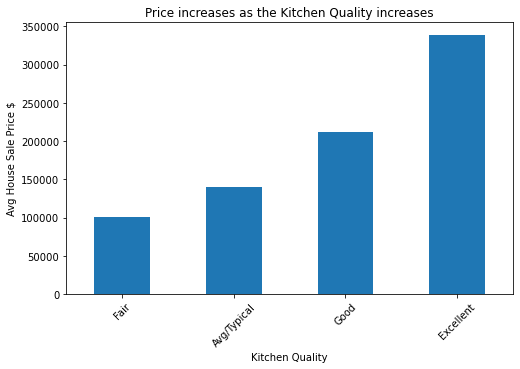

In [32]:
plt.figure(figsize=(8,5))
df.groupby('Kitchen Qual')['SalePrice'].mean().sort_values().plot.bar();
plt.title('Price increases as the Kitchen Quality increases')
plt.xlabel('Kitchen Quality')
plt.ylabel('Avg House Sale Price $');
plt.xticks([0, 1, 2, 3],('Fair', 'Avg/Typical', 'Good', 'Excellent'), rotation=45);

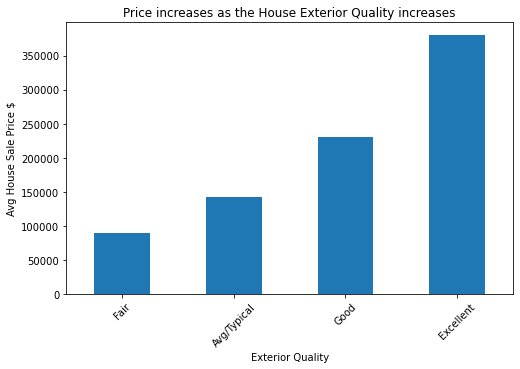

In [33]:
plt.figure(figsize=(8,5))
df.groupby('Exter Qual')['SalePrice'].mean().sort_values().plot.bar();
plt.title('Price increases as the House Exterior Quality increases')
plt.xlabel('Exterior Quality')
plt.ylabel('Avg House Sale Price $');
plt.xticks([0, 1, 2, 3],('Fair', 'Avg/Typical', 'Good', 'Excellent'), rotation=45);

In [34]:
# Export cleaned data to a CSV file
df.to_csv('./datasets/cleaned_train.csv', index=False)